In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
iris_dataset=pd.read_csv('C:/Users/Venati Himanth/OneDrive/Desktop/strive/python/ML/Day1/iris.csv',sep=',')

In [7]:
iris_dataset

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [22]:
iris_dataset.rename({'sepal.length':'Sepal_length(cm)','sepal.width':'Sepal_width(cm)','petal.length':'Petal_length(cm)','petal.width':'Petal_width(cm)','variety':'Variety'},axis=1,inplace=True)

In [23]:
#Basic Info
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sepal_length(cm)  150 non-null    float64
 1   Sepal_width(cm)   150 non-null    float64
 2   Petal_length(cm)  150 non-null    float64
 3   Petal_width(cm)   150 non-null    float64
 4   Variety           150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [27]:
#To display number of samples in each class
iris_dataset['Variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: Variety, dtype: int64

''' For each class we have 50 samples'''
'''Preprocessing'''

In [30]:
#check for null values
iris_dataset.isnull().sum()

Sepal_length(cm)    0
Sepal_width(cm)     0
Petal_length(cm)    0
Petal_width(cm)     0
Variety             0
dtype: int64

#Data visuvalization

<AxesSubplot:>

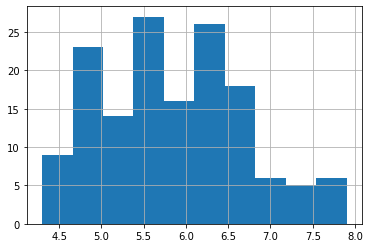

In [31]:
#Histogram
iris_dataset['Sepal_length(cm)'].hist()

<AxesSubplot:>

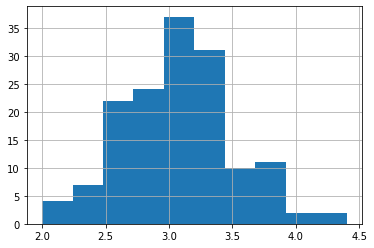

In [33]:
iris_dataset['Sepal_width(cm)'].hist()

<AxesSubplot:>

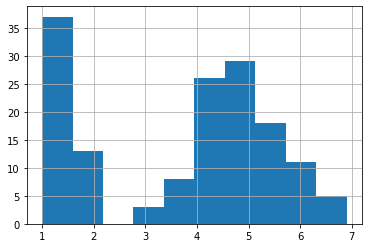

In [35]:
iris_dataset['Petal_length(cm)'].hist()

<AxesSubplot:>

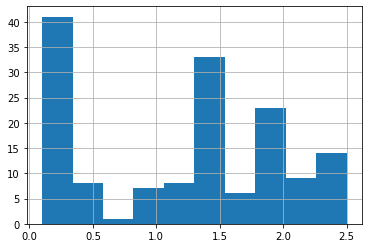

In [36]:
iris_dataset['Petal_width(cm)'].hist()

''' clearly see the vizsuvalization by comparing all the attributes'''

In [37]:
#scatterplot
colors=['green','blue','red']
Variety=['Setosa','Versicolor','Virginica']

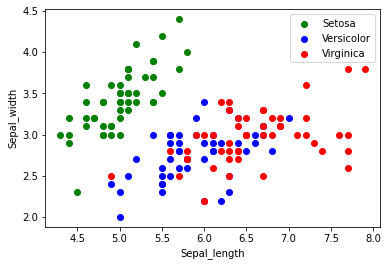

In [39]:
for i in range(3):
    x=iris_dataset[iris_dataset['Variety']== Variety[i]]
    plt.scatter(x['Sepal_length(cm)'],x['Sepal_width(cm)'],c=colors[i],label=Variety[i])
plt.xlabel('Sepal_length')   
plt.ylabel('Sepal_width') 
plt.legend()


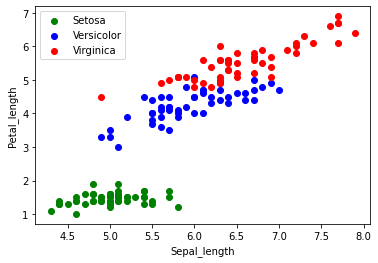

In [44]:
for i in range(3):
    x=iris_dataset[iris_dataset['Variety']==Variety[i]]
    plt.scatter(x['Sepal_length(cm)'],x['Petal_length(cm)'],c=colors[i],label=Variety[i])
plt.xlabel('Sepal_length') 
plt.ylabel('Petal_length')
plt.legend()


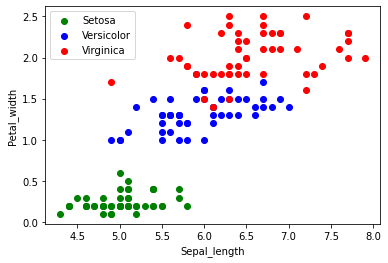

In [46]:
for i in range(3):
    x=iris_dataset[iris_dataset['Variety']==Variety[i]]
    plt.scatter(x['Sepal_length(cm)'],x['Petal_width(cm)'],c=colors[i],label=Variety[i])
plt.xlabel('Sepal_length')   
plt.ylabel('Petal_width') 
plt.legend()

''' Coorelation Matrix'''
#It shows the corelation coefficients between variables.The values is in the range -1 to 1

In [50]:
iris_dataset.corr()

,Sepal_length(cm),Sepal_width(cm),Petal_length(cm),Petal_width(cm)
Sepal_length(cm),1.000000,-0.117570,0.871754,0.817941
Sepal_width(cm),-0.117570,1.000000,-0.428440,-0.366126
Petal_length(cm),0.871754,-0.428440,1.000000,0.962865
Petal_width(cm),0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

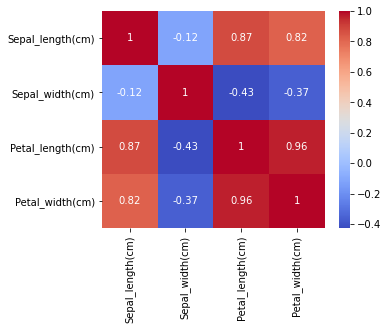

In [54]:
corr=iris_dataset.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')


'''Lable Encoder'''
#words to numaric form

In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

iris_dataset['Variety']=le.fit_transform(iris_dataset['Variety'])

In [56]:
iris_dataset

,Sepal_length(cm),Sepal_width(cm),Petal_length(cm),Petal_width(cm),Variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


'''Model Training'''


In [80]:
from sklearn.model_selection import train_test_split
x=iris_dataset.drop(columns=['Variety'])
y=iris_dataset['Variety']
x_train,x_text,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [81]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [82]:
#Model training
model.fit(x_train,y_train)

LogisticRegression()

In [83]:
#print metric to get performance
print('Accuracy:',model.score(x_text,y_test)*100,'%')

Accuracy: 100.0 %


In [84]:
#knn-k- nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(x_train,y_train)
print('Accuracy:',model2.score(x_text,y_test)*100,'%')

Accuracy: 100.0 %


In [85]:
#Decision tree 
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier()
model3.fit(x_train,y_train)
print('Accuracy=',model3.score(x_text,y_test)*100,'%')


Accuracy= 100.0 %
